In [1]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)



from skimage.measure import block_reduce
import numpy as np

import logging
import pickle
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="bright")
from notebook_utils import plot 


from model import base, provider, heatmap_evaluation
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

In [8]:
def plot_heatmaps(model, dataset, seq):

    model_path = '.%s' % provider._model_path(model, dataset, seq)
    print(model_path)
    plot.plot_relevance_methods(model_path, dataset_loader, only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

# Setting 1

# Experiment concatenated mnists with correct class having 2 digits
![](https://i.imgur.com/RMk0gQN.png)

## Heatmaps of MNIST

../final-models/shallow-mnist-3-digits-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


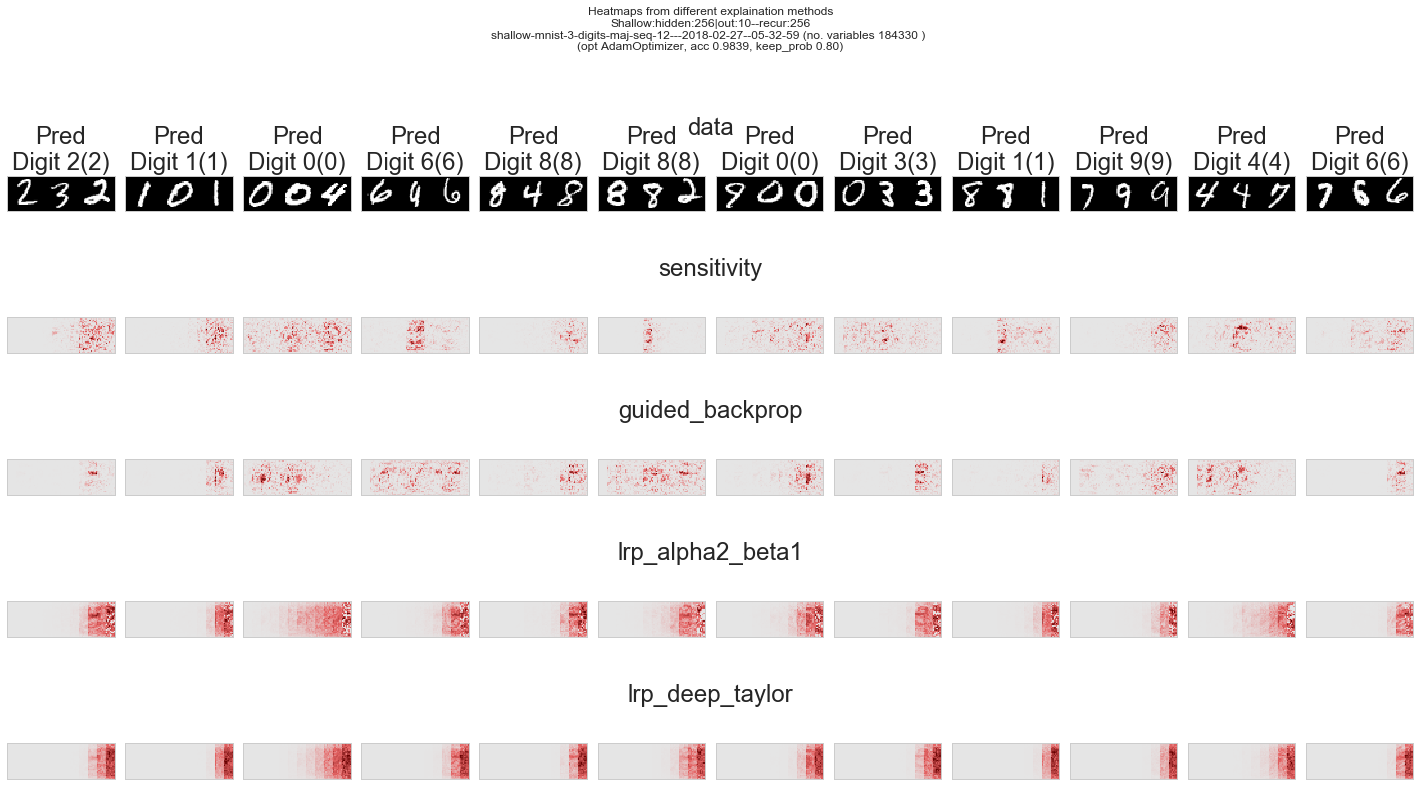

In [9]:
plot_heatmaps('shallow', 'mnist-3-digits-maj', 12)

../final-models/deep-mnist-3-digits-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


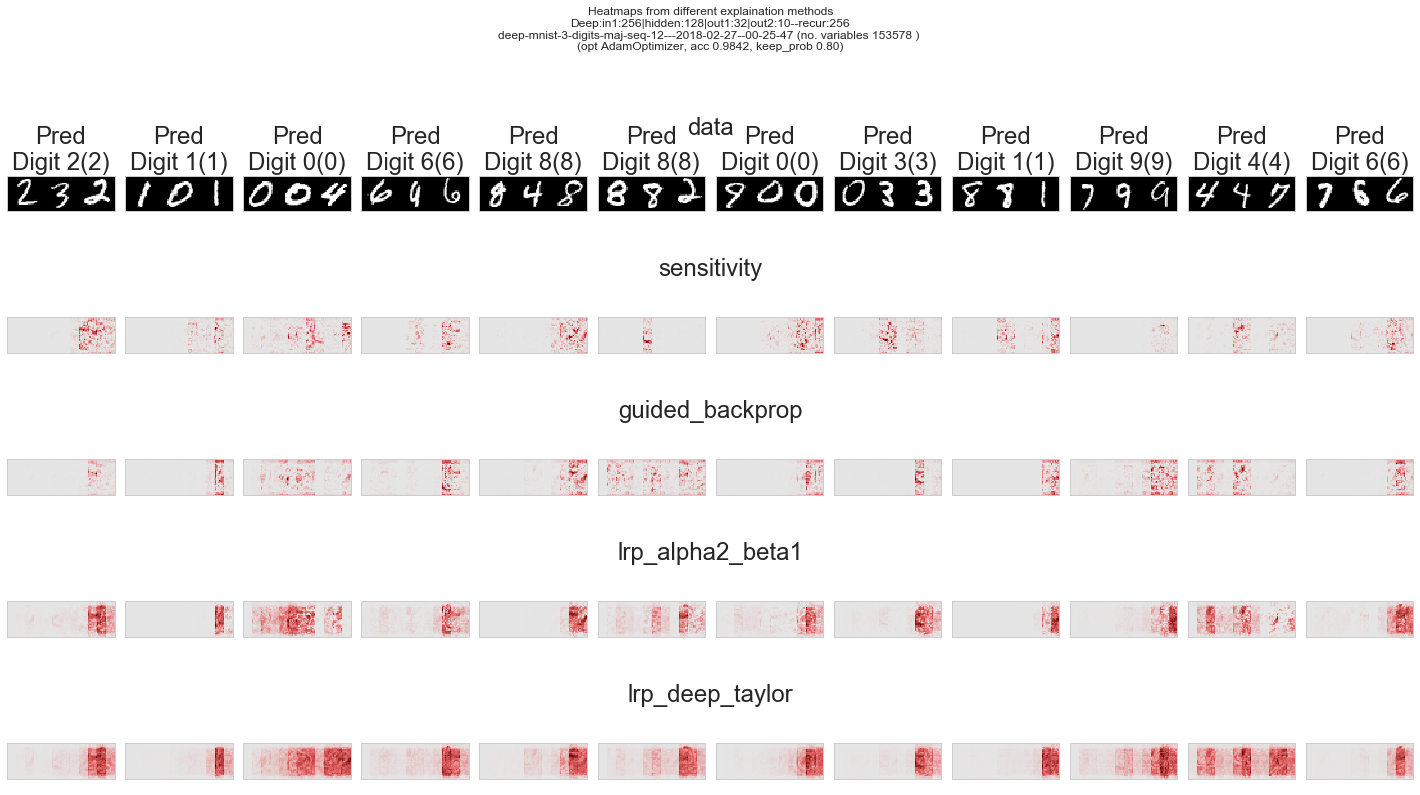

In [10]:
plot_heatmaps('deep', 'mnist-3-digits-maj', 12)

../final-models/deep_v2-mnist-3-digits-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


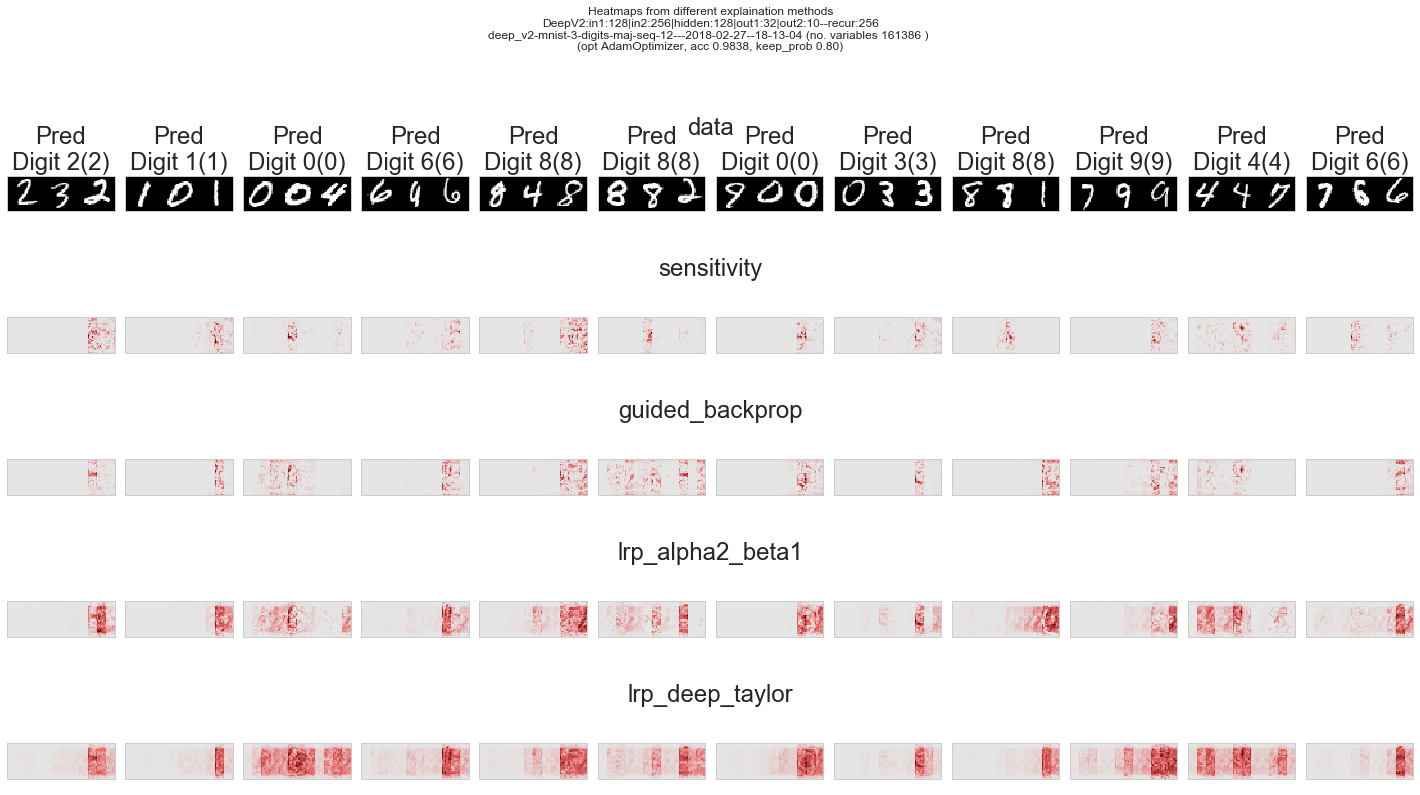

In [11]:
plot_heatmaps('deep_v2', 'mnist-3-digits-maj', 12)

../final-models/convdeep-mnist-3-digits-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


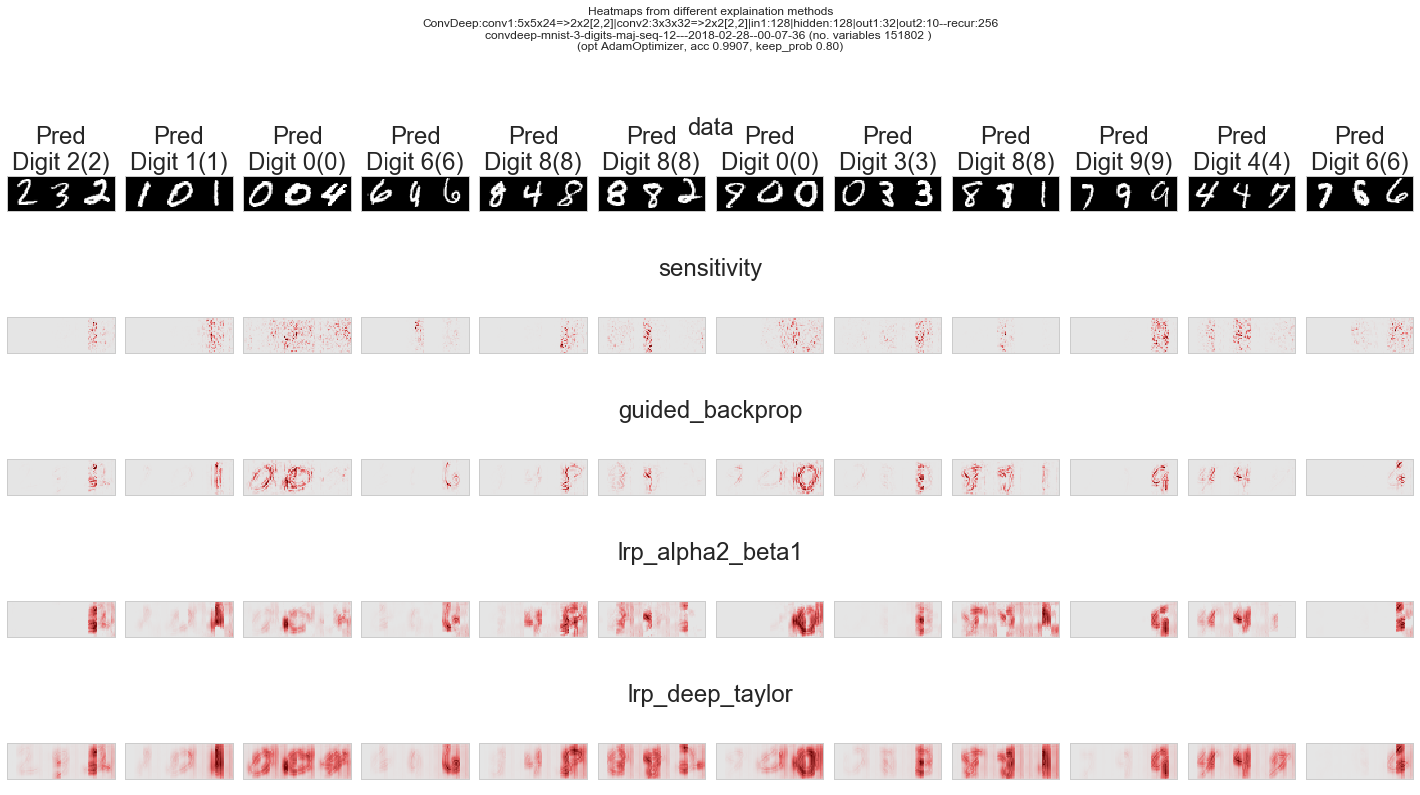

In [12]:
plot_heatmaps('convdeep', 'mnist-3-digits-maj', 12)

## Heatmaps of FashionMNIST

../final-models/shallow-fashion-mnist-3-items-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


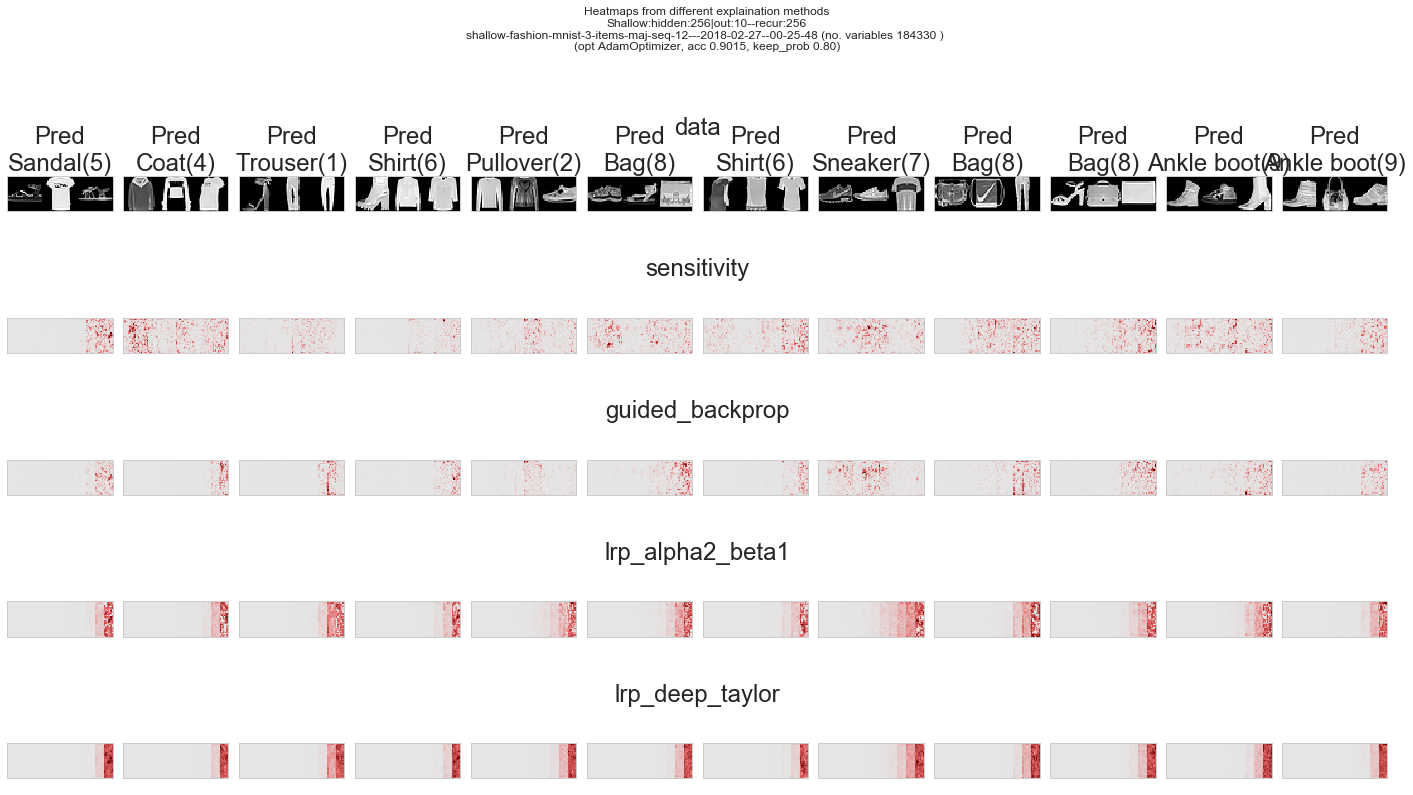

In [15]:
plot_heatmaps('shallow', 'fashion-mnist-3-items-maj', 12)

../final-models/deep-fashion-mnist-3-items-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


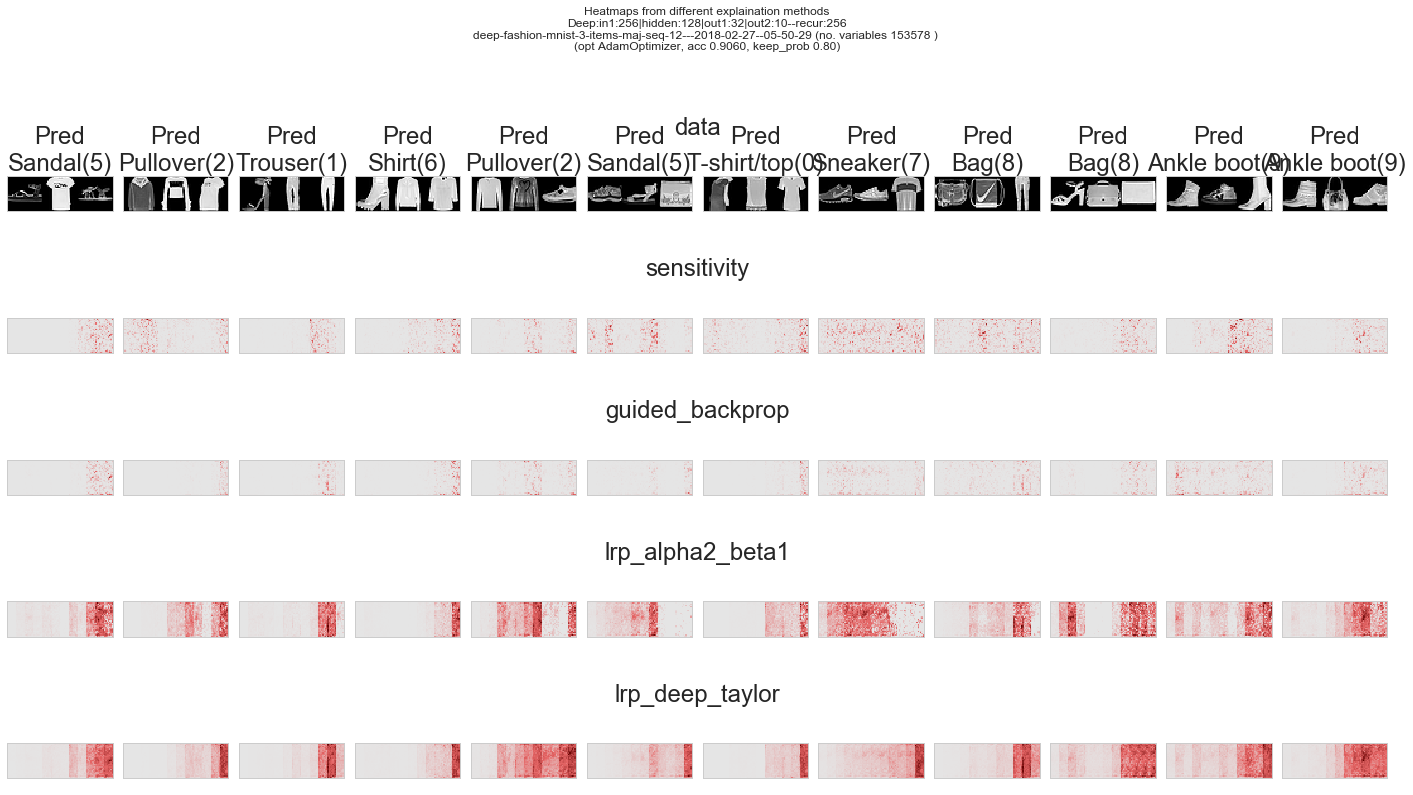

In [16]:
plot_heatmaps('deep', 'fashion-mnist-3-items-maj', 12)

../final-models/deep_v2-fashion-mnist-3-items-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


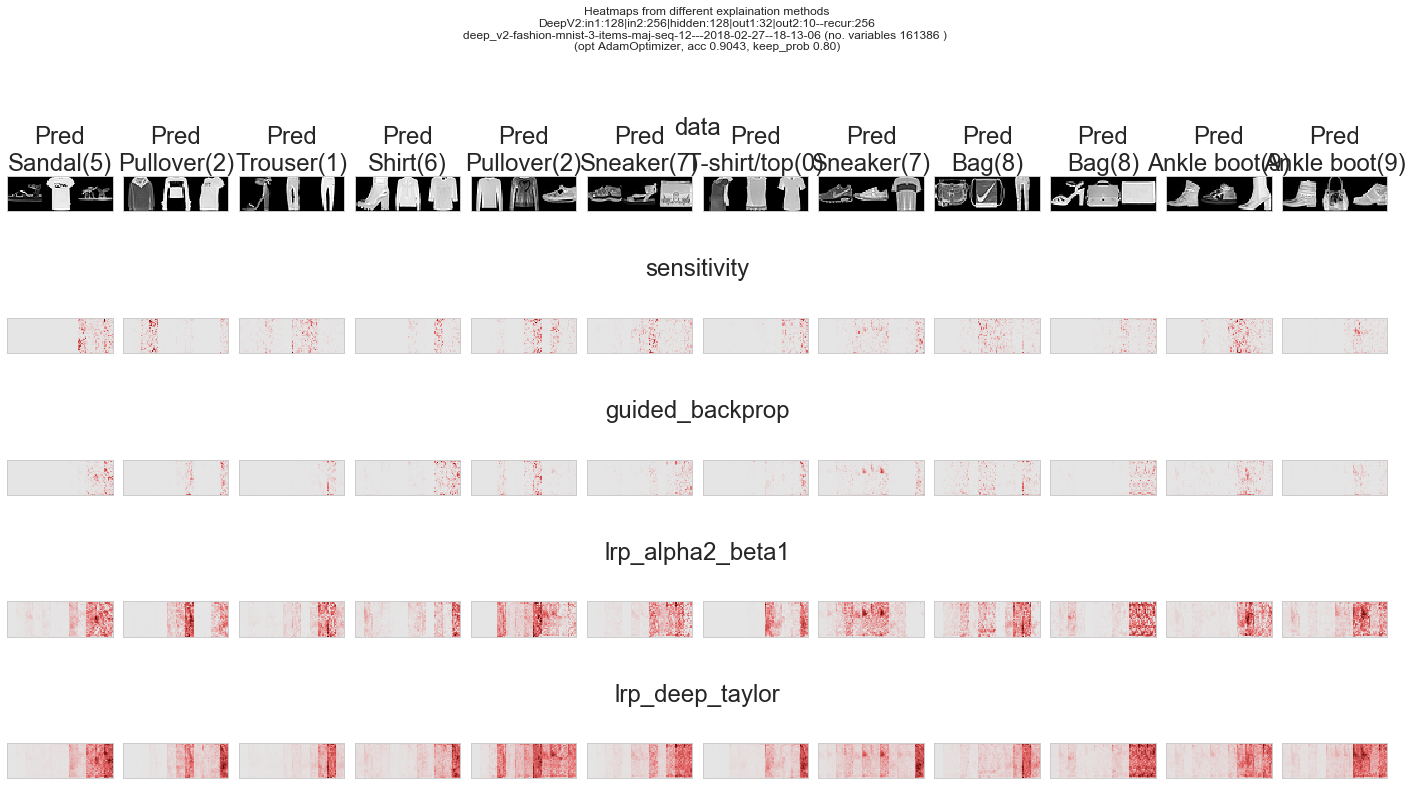

In [13]:
plot_heatmaps('deep_v2', 'fashion-mnist-3-items-maj', 12)

../final-models/convdeep-fashion-mnist-3-items-maj-seq-12


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


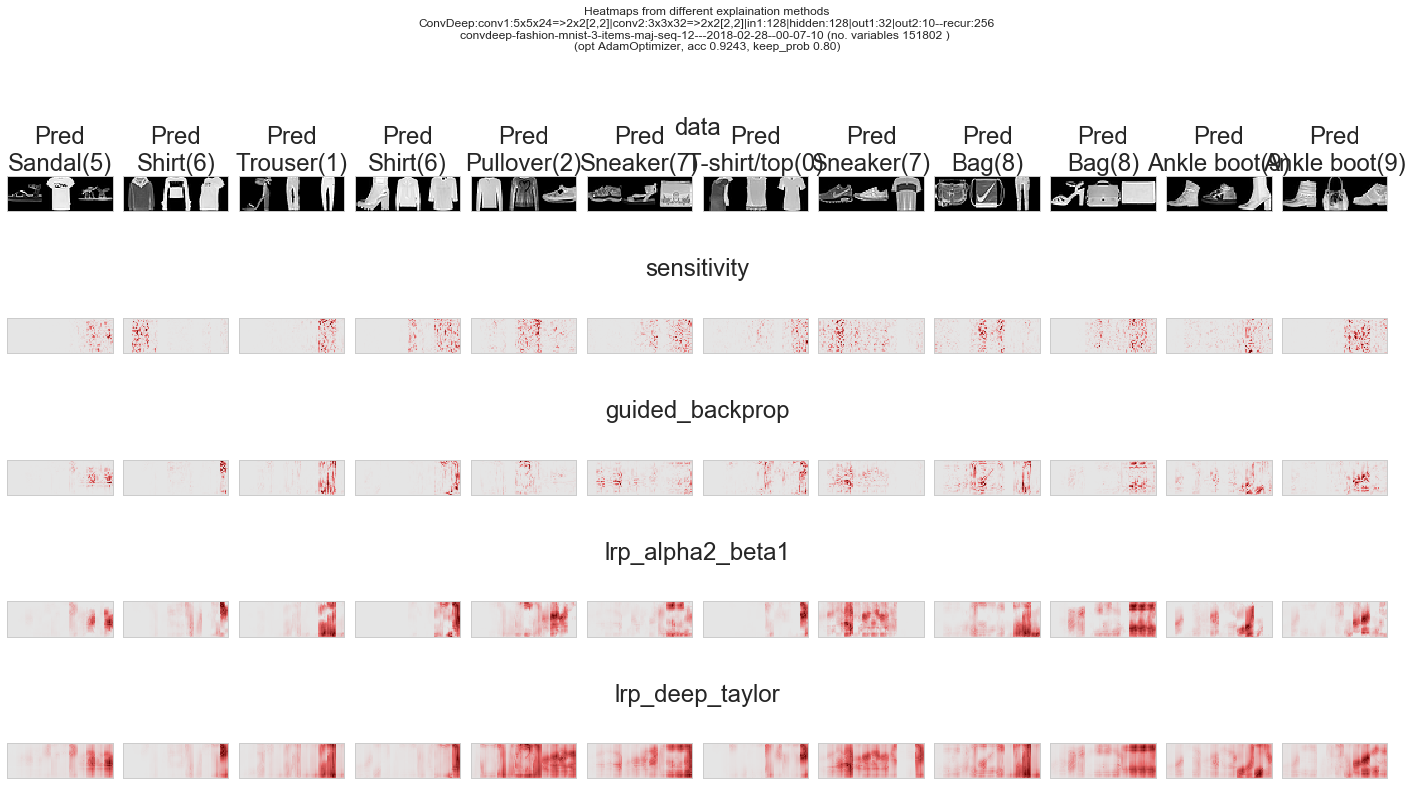

In [14]:
plot_heatmaps('convdeep', 'fashion-mnist-3-items-maj', 12)

## Relevance Distributions

[]


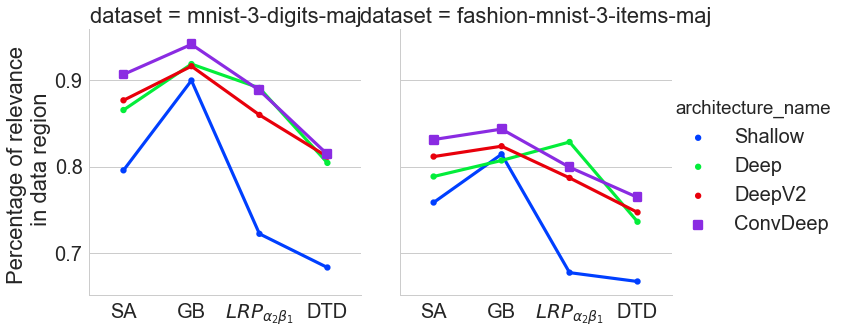

In [34]:
def plot_relevance_dist_in_middle_region(datasets=['mnist-3-digits'], seq=12, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor']):
    results = []
    print(results)
    for dataset in datasets:
        for model in ['shallow', 'deep', 'deep_v2', 'convdeep']:
#             print(model)
            file = "../final-models/%s-%s-seq-%d/rel-dist.pkl" % (model, dataset, seq)
            try:
#                 print('getting data from %s' % file)
                results = results + pickle.load(open(file, "rb"))
            except:
                print('%s not found' % file)
#     print(results)
    df = None
    df = pd.DataFrame(results)
    df = df[df.method.isin(methods)]
    
    def get_marker_linestyle(method):
        if method == 'guided_backprop':
            mk = 's'
            ls = '-'
        elif 'lrp' in method:
            mk = '^'
            ls = '-'
        else:
            mk = '.'
            ls =':'
        return mk, ls
    marker_linestyles = [get_marker_linestyle(m) for m in methods]
#     markers = [ m[0] for m in marker_linestyles ]
#     linestyles = [ m[1] for m in marker_linestyles ]
    df['architecture_idx'] = df['architecture'].apply(plot.architecture_idx)
    df['architecture_name'] = df['architecture'].apply(config.architecture_name)
    method_indices = dict(zip(methods, range(len(methods))))
    df['method_idx'] = df['method'].apply(lambda m: method_indices[m])

    col_name = 'Percentage of relevance \n in data region'
    df[col_name] = df['rel_dist_in_data_region']
#     print(df)

#     for c in [col_name]:

    g = sns.factorplot(x="method_idx", y=col_name, col='dataset', hue="architecture_name",
                       data=df, size=5,
                           markers=['.', '.', '.', 's'])
#                            linestyles=linestyles)

    g.set_xticklabels(['SA', 'GB',  '$LRP_{\\alpha_2\\beta_1}$', 'DTD'])
    g.set(xlabel='')
    return df


plot_relevance_dist_in_middle_region(['mnist-3-digits-maj', 'fashion-mnist-3-items-maj'])
plt.savefig("rel-maj-problem.svg")

## Model Accuracy

In [17]:
plot.show_model_accuracy('mnist-3-digits-maj', seqs=[12])

mnist-3-digits-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.9839,0.9842,0.9838,0.9907


In [18]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', seqs=[12])

fashion-mnist-3-items-maj accuracy


/Users/heytitle/projects/heatmapping-tutorial/src/model/components/layer.py:25: RuntimeWarning: divide by zero encountered in log
  self.b = tf.Variable(tf.ones(dims[-1]) * float(np.log(np.exp(DEFAULT_BIAS_VALUE)-1)), name=b_name)


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.9015,0.906,0.9043,0.9243
